# Wine Quality Prediction Analysis - Classification
Video Tutorial: https://youtu.be/W25TEa93T_I

## Dataset Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

#### Attribute Information:
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

## Libraries
- pandas
- matplotlib
- seaborn
- scikit-learn

## Algorithms
- logistic Regression
- Decision Tree
- Random Forest
- Extra Trees
- XGBoost
- LightGBM

##### Best Model Accuracy: 89.00 
(*tutorial과 코드 똑같이 돌렸는데, 이 파일에서는 accuracy: 88.8이 가장 높은 걸로 나옵니다) 

## Future Work
- Removing Outliers
- Removing Attributes
- Hyperparameter Tuning
- Random UnderSampling

## Import modules

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
pip install -U imbalanced-learn

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

## Loading the dataset

In [148]:
df=pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [67]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [68]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Preprocessing the dataset

In [69]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [149]:
# fill the missing values
for col, value in df.items():
    if col!='type':
        df[col]=df[col].fillna(df[col].mean())

In [71]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

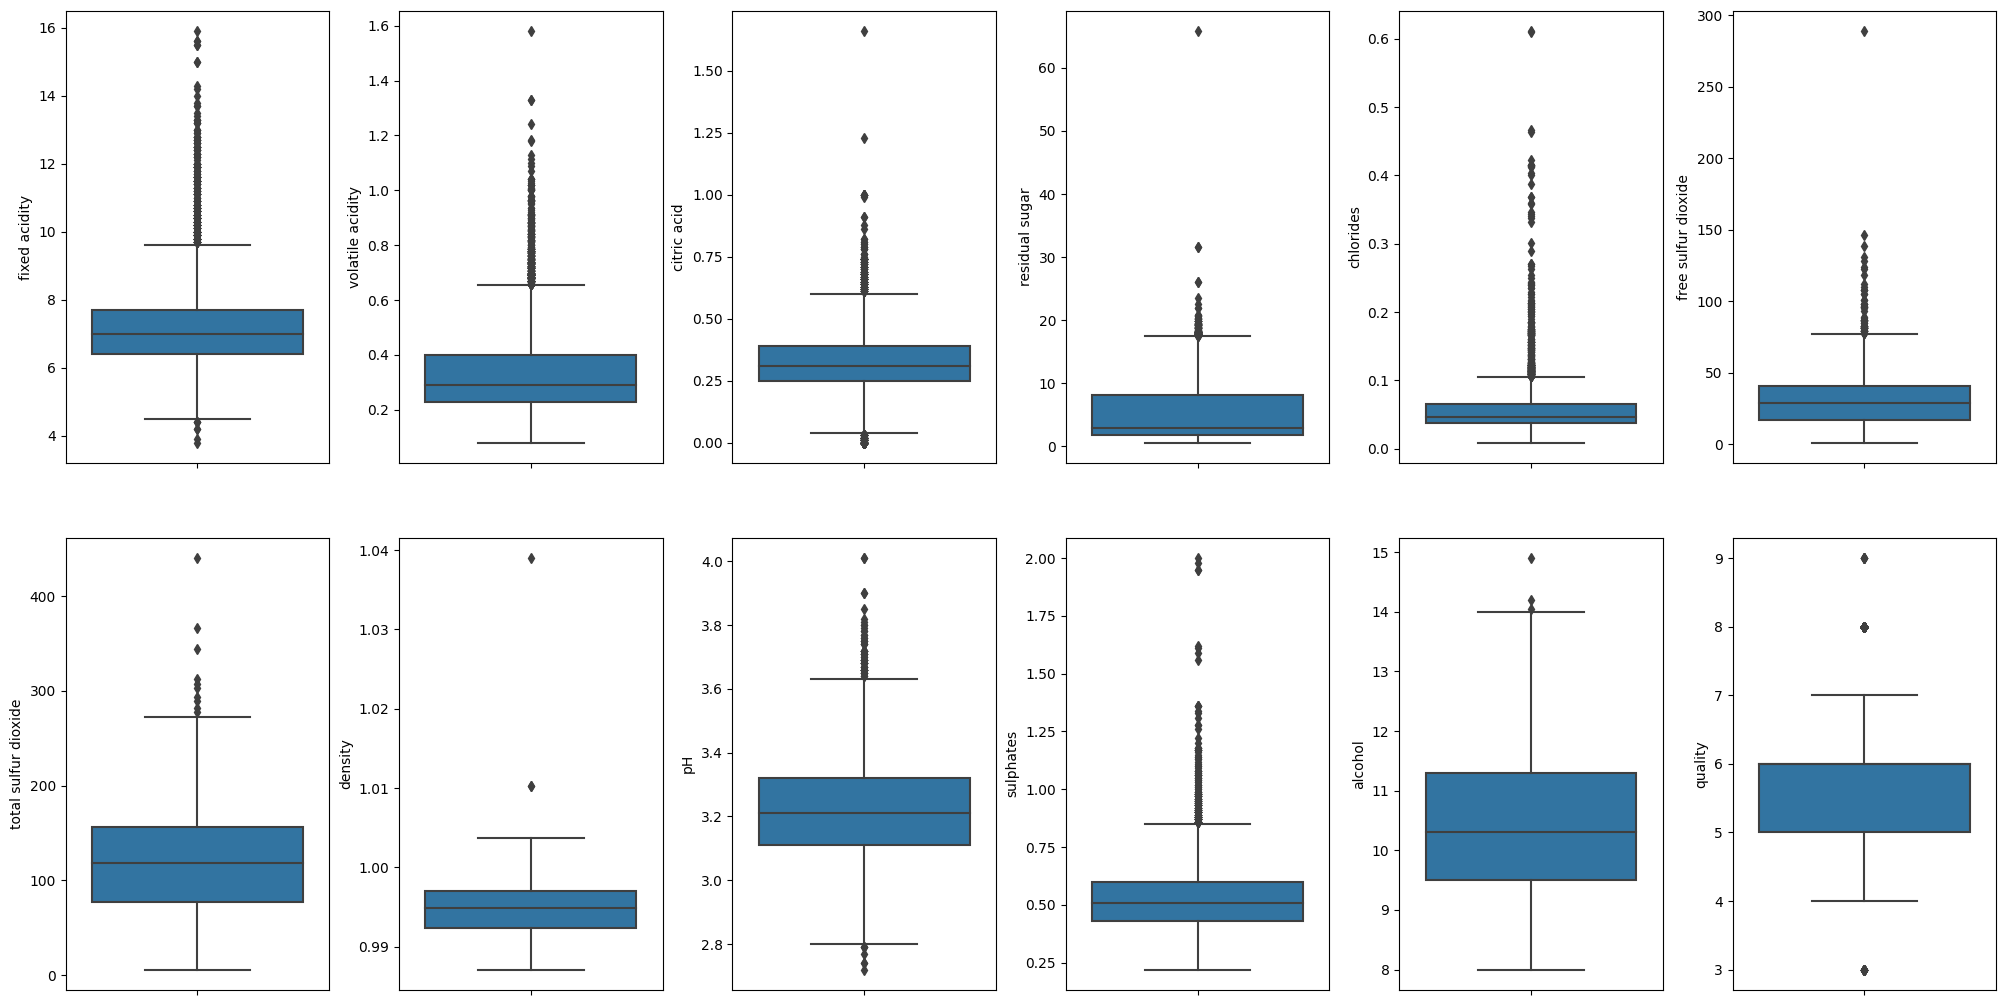

In [72]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

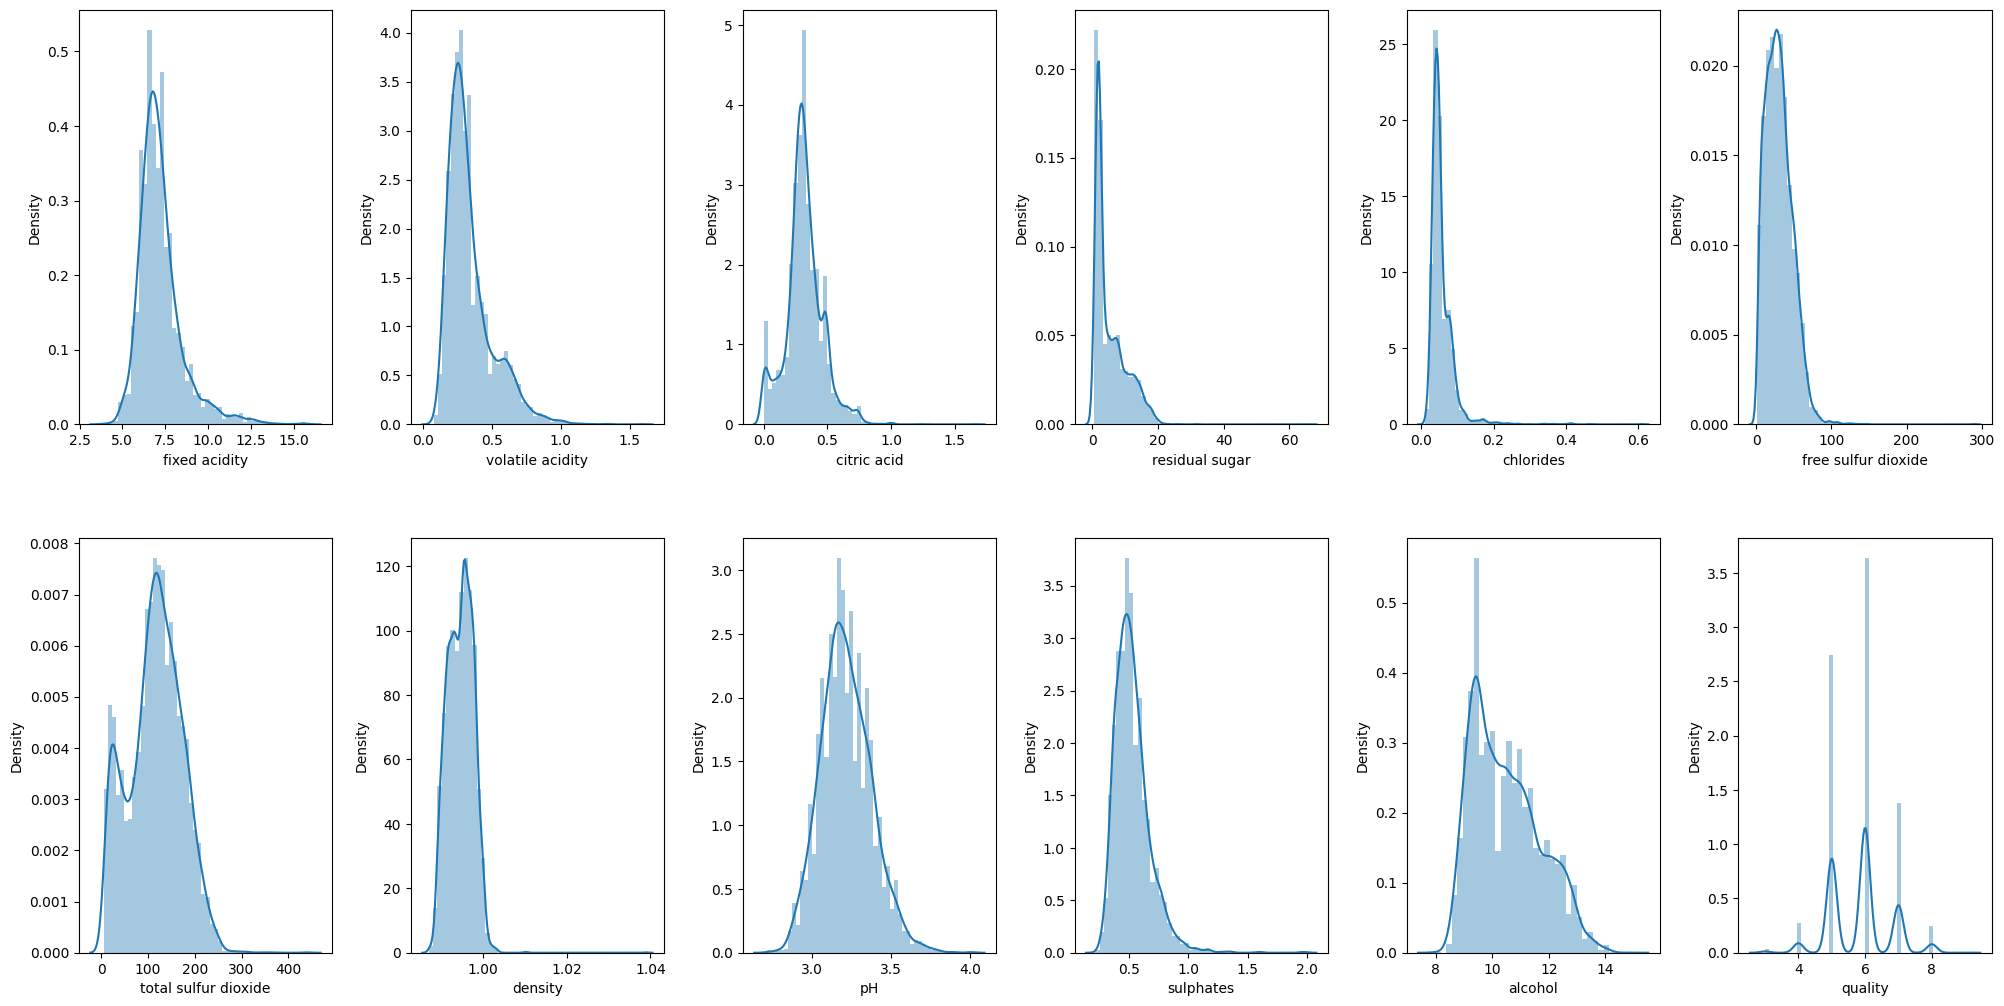

In [73]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [150]:
# Log transformation
df['free sulfur dioxide']=np.log(1+df['free sulfur dioxide'])

<AxesSubplot: xlabel='free sulfur dioxide', ylabel='Density'>

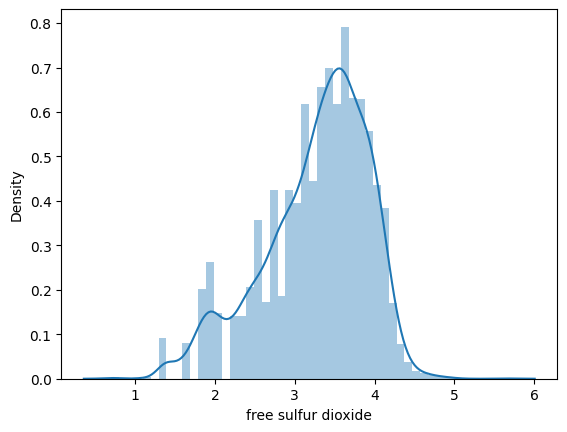

In [14]:
sns.distplot(df['free sulfur dioxide'])

In [ ]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

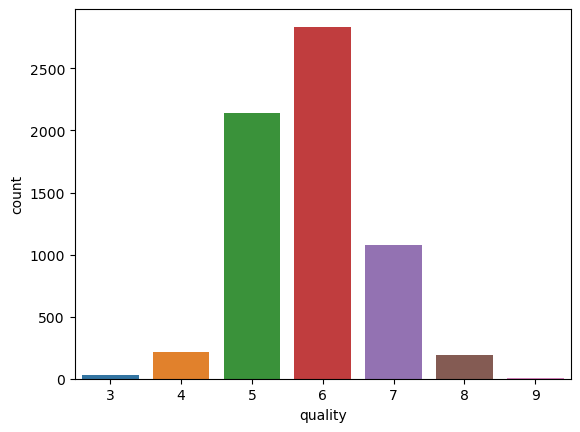

In [ ]:
sns.countplot(df['quality'])

## Coorelation Matrix

<AxesSubplot:>

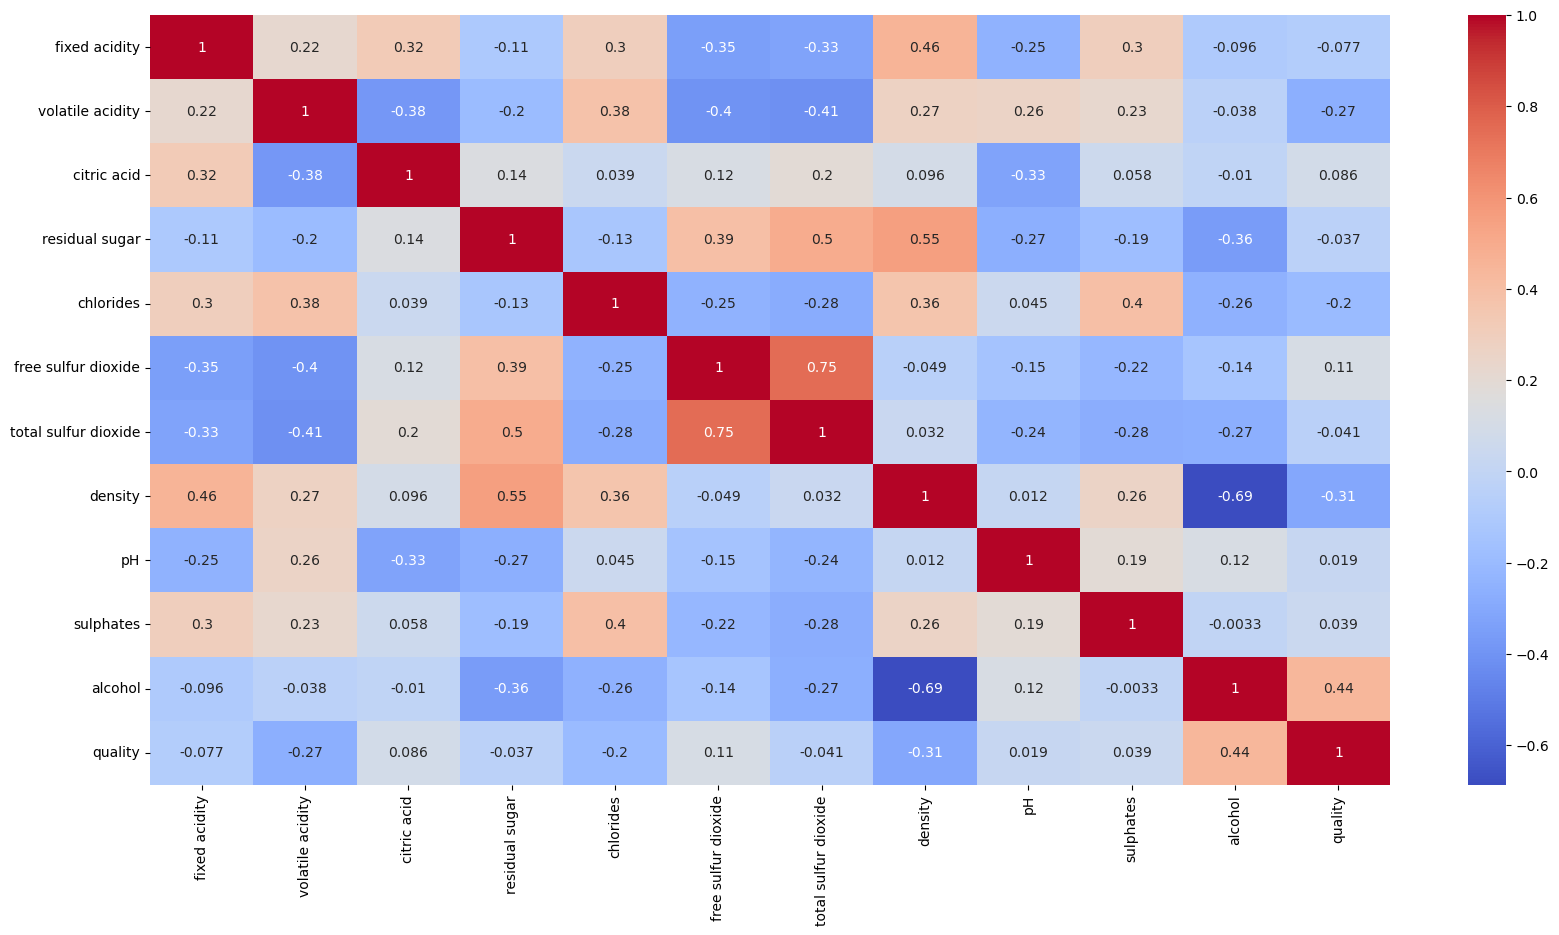

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split
#### split하지 않고 이진화하는 것으로 변경
#### 또한 튜토리얼과 우리 예측과의 비교가능성을 위해 튜토리얼의 quality 분류도 3을 4등급에 편입, 9를 8등급에 편입으로 처리함

In [151]:
# string인 type column을 0과 1로 변경
df = df.drop('type', axis=1)
# quality 분류도 3을 4등급에 편입, 9를 8등급에 편입
df['quality'] = df['quality'].replace({3: 4, 9: 8})

In [152]:
# 라벨과 피처 분류
X = df.drop(columns=['quality'])
y = df['quality']

## Class Imbalancement

In [154]:
y.value_counts()

6    2836
5    2138
7    1079
4     246
8     198
Name: quality, dtype: int64

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [114]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Model Training

In [57]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [159]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=100)
    ros = RandomOverSampler(random_state=100)

    ### oversampling 과정에서 전체 데이터셋에 적용했던 문제를 training data에만 한정하여 적용 ###
    X_train, y_train = ros.fit_resample(X_train, y_train) ########################
    ############################################################################## 

    # train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

    #cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:",np.mean(score)*100)

    ## 
    evaluate_wine_grade(y_test, y_pred)
    eval_model_v2(y_test, y_pred)

def classify_xgb(model, X, y):
    X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=100)
    ros = RandomOverSampler(random_state=100)
    X_train, y_train = ros.fit_resample(X_train, y_train)
    # train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

    #cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:",np.mean(score)*100)

    ## 해당 함수에 포함시킴
    evaluate_wine_grade(y_test, y_pred)
    eval_model_xgb(y_test, y_pred)

In [158]:
def eval_model_v2(y_true, y_pred):
    class_names = [4, 5, 6, 7, 8]

    # Confusion Matrix
    confusion_mat = confusion_matrix(y_true, y_pred, labels=class_names)
    print("Confusion Matrix:\n", confusion_mat)

    # Total Accuracy
    total_accuracy = accuracy_score(y_true, y_pred)
    print("Total Accuracy:", total_accuracy)

    # Class-wise Metrics
    precision = precision_score(y_true, y_pred, labels=class_names, average=None)
    recall = recall_score(y_true, y_pred, labels=class_names, average=None)
    f1 = f1_score(y_true, y_pred, labels=class_names, average=None)

    for i, class_name in enumerate(class_names):
        print(f"Class {class_name}:")
        print(f"  Accuracy: {confusion_mat[i, i] / sum(confusion_mat[i, :])}")
        print(f"  Precision: {precision[i]}")
        print(f"  Recall: {recall[i]}")
        print(f"  F1-score: {f1[i]}")

    # Macro-Average Metrics
    macro_precision = sum(precision) / len(class_names)
    macro_recall = sum(recall) / len(class_names)
    macro_f1 = sum(f1) / len(class_names)
    print("\nMacro-Average Metrics:")
    print(f"  Macro-Average Precision: {macro_precision}")
    print(f"  Macro-Average Recall: {macro_recall}")
    print(f"  Macro-Average F1-score: {macro_f1}")

    # Weighted-Average Metrics
    weights = [sum(confusion_mat[i, :]) for i in range(len(class_names))]
    total_samples = sum(weights)
    weighted_precision = sum(precision[i] * weights[i] for i in range(len(class_names))) / total_samples
    weighted_recall = sum(recall[i] * weights[i] for i in range(len(class_names))) / total_samples
    weighted_f1 = sum(f1[i] * weights[i] for i in range(len(class_names))) / total_samples
    print("\nWeighted-Average Metrics:")
    print(f"  Weighted-Average Precision: {weighted_precision}")
    print(f"  Weighted-Average Recall: {weighted_recall}")
    print(f"  Weighted-Average F1-score: {weighted_f1}")

def eval_model_xgb(y_true, y_pred):
    class_names = [0, 1, 2, 3, 4]

    # Confusion Matrix
    confusion_mat = confusion_matrix(y_true, y_pred, labels=class_names)
    print("Confusion Matrix:\n", confusion_mat)

    # Total Accuracy
    total_accuracy = accuracy_score(y_true, y_pred)
    print("Total Accuracy:", total_accuracy)

    # Class-wise Metrics
    precision = precision_score(y_true, y_pred, labels=class_names, average=None)
    recall = recall_score(y_true, y_pred, labels=class_names, average=None)
    f1 = f1_score(y_true, y_pred, labels=class_names, average=None)

    for i, class_name in enumerate(class_names):
        print(f"Class {class_name}:")
        print(f"  Accuracy: {confusion_mat[i, i] / sum(confusion_mat[i, :])}")
        print(f"  Precision: {precision[i]}")
        print(f"  Recall: {recall[i]}")
        print(f"  F1-score: {f1[i]}")

    # Macro-Average Metrics
    macro_precision = sum(precision) / len(class_names)
    macro_recall = sum(recall) / len(class_names)
    macro_f1 = sum(f1) / len(class_names)
    print("\nMacro-Average Metrics:")
    print(f"  Macro-Average Precision: {macro_precision}")
    print(f"  Macro-Average Recall: {macro_recall}")
    print(f"  Macro-Average F1-score: {macro_f1}")

    # Weighted-Average Metrics
    weights = [sum(confusion_mat[i, :]) for i in range(len(class_names))]
    total_samples = sum(weights)
    weighted_precision = sum(precision[i] * weights[i] for i in range(len(class_names))) / total_samples
    weighted_recall = sum(recall[i] * weights[i] for i in range(len(class_names))) / total_samples
    weighted_f1 = sum(f1[i] * weights[i] for i in range(len(class_names))) / total_samples
    print("\nWeighted-Average Metrics:")
    print(f"  Weighted-Average Precision: {weighted_precision}")
    print(f"  Weighted-Average Recall: {weighted_recall}")
    print(f"  Weighted-Average F1-score: {weighted_f1}")

In [ ]:
def evaluate_wine_grade(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true_adj = np.maximum(y_true.reshape(-1) - 1, y_pred)
    y_pred_adj = np.minimum(y_pred, y_true.reshape(-1))
    y_true_penalty = (y_true_adj != y_true.reshape(-1))
    y_pred_penalty = (y_pred_adj != y_pred)
    penalty = np.logical_and(y_true_penalty, y_pred_penalty)
    penalty_weight = np.ones_like(y_true.reshape(-1))
    penalty_weight[penalty] = 2
    acc = accuracy_score(y_true_adj, y_pred_adj, sample_weight=penalty_weight)
    precision = precision_score(y_true_adj, y_pred_adj, average='weighted')
    recall = recall_score(y_true_adj, y_pred_adj, average='weighted')
    f1 = f1_score(y_true_adj, y_pred_adj, average='weighted')
    print(f"  Accuracy: {acc}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")

In [160]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy: 0.2676923076923077
Precision: 0.42310274169034834
Recall: 0.2676923076923077
F1 score: 0.2919992435683162
CV Score: 45.790655533842596
  Accuracy: 0.33969465648854963
  Precision: 0.6210946208515369
  Recall: 0.47923076923076924
  F1-score: 0.42905568991263154
Confusion Matrix:
 [[ 21  10   5  10   8]
 [111 155  66  32  35]
 [ 89 139  97  80 173]
 [ 27  23  20  43 115]
 [  2   0   2   5  32]]
Total Accuracy: 0.2676923076923077
Class 4:
  Accuracy: 0.3888888888888889
  Precision: 0.084
  Recall: 0.3888888888888889
  F1-score: 0.13815789473684212
Class 5:
  Accuracy: 0.38847117794486213
  Precision: 0.4740061162079511
  Recall: 0.38847117794486213
  F1-score: 0.4269972451790634
Class 6:
  Accuracy: 0.16782006920415224
  Precision: 0.5105263157894737
  Recall: 0.16782006920415224
  F1-score: 0.2526041666666667
Class 7:
  Accuracy: 0.18859649122807018
  Precision: 0.2529411764705882
  Recall: 0.18859649122807018
  F1-score: 0.21608040201005024
Class 8:
  Accuracy: 0.7804878048780

In [111]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model ,X, y)

Accuracy: 0.6061538461538462
Precision: 0.6004870309852762
Recall: 0.6061538461538462
F1 score: 0.6027784880114776
CV Score: 40.01867708888495
  Accuracy: 0.6316463805253043
  Precision: 0.8078725143242708
  Recall: 0.7584615384615384
  F1-score: 0.7638713482105588
Confusion Matrix:
 [[  0   1   0   4   0   1   0]
 [  1   7  22  15   2   1   0]
 [  2  10 261 107  18   1   0]
 [  4   8 107 380  69  10   0]
 [  0   3  24  69 122  10   0]
 [  0   0   1  11  11  18   0]
 [  0   0   0   0   0   0   0]]
Total Accuracy: 0.6061538461538462
Class 3:
  Accuracy: 0.0
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0
Class 4:
  Accuracy: 0.14583333333333334
  Precision: 0.2413793103448276
  Recall: 0.14583333333333334
  F1-score: 0.18181818181818185
Class 5:
  Accuracy: 0.6541353383458647
  Precision: 0.6289156626506024
  Recall: 0.6541353383458647
  F1-score: 0.6412776412776413
Class 6:
  Accuracy: 0.657439446366782
  Precision: 0.6484641638225256
  Recall: 0.657439446366782
  F1-score: 0.6529209621

In [161]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model ,X, y)

Accuracy: 0.6653846153846154
Precision: 0.6625681036052702
Recall: 0.6653846153846154
F1 score: 0.6554245483806557
CV Score: 50.499757209687935
  Accuracy: 0.7111553784860558
  Precision: 0.8625354299339436
  Recall: 0.8238461538461539
  F1-score: 0.8331511582013218
Confusion Matrix:
 [[  8  32  13   1   0]
 [  2 300  91   6   0]
 [  4  95 419  59   1]
 [  0  12  91 122   3]
 [  0   0   7  18  16]]
Total Accuracy: 0.6653846153846154
Class 4:
  Accuracy: 0.14814814814814814
  Precision: 0.5714285714285714
  Recall: 0.14814814814814814
  F1-score: 0.23529411764705882
Class 5:
  Accuracy: 0.7518796992481203
  Precision: 0.683371298405467
  Recall: 0.7518796992481203
  F1-score: 0.7159904534606204
Class 6:
  Accuracy: 0.7249134948096886
  Precision: 0.6747181964573269
  Recall: 0.7249134948096886
  F1-score: 0.6989157631359466
Class 7:
  Accuracy: 0.5350877192982456
  Precision: 0.5922330097087378
  Recall: 0.5350877192982456
  F1-score: 0.5622119815668204
Class 8:
  Accuracy: 0.3902439024

In [163]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model ,X, y)

Accuracy: 0.6746153846153846
Precision: 0.674550969003682
Recall: 0.6746153846153846
F1 score: 0.6589787895927601
CV Score: 51.14627820216734
  Accuracy: 0.7231903485254692
  Precision: 0.8747134898847891
  Recall: 0.83
  F1-score: 0.8431324840574271
Confusion Matrix:
 [[  5  34  15   0   0]
 [  3 286 108   2   0]
 [  2  84 462  29   1]
 [  0  13 103 109   3]
 [  0   0  14  12  15]]
Total Accuracy: 0.6746153846153846
Class 4:
  Accuracy: 0.09259259259259259
  Precision: 0.5
  Recall: 0.09259259259259259
  F1-score: 0.15625
Class 5:
  Accuracy: 0.7167919799498746
  Precision: 0.6858513189448441
  Recall: 0.7167919799498746
  F1-score: 0.7009803921568627
Class 6:
  Accuracy: 0.7993079584775087
  Precision: 0.6581196581196581
  Recall: 0.7993079584775087
  F1-score: 0.721875
Class 7:
  Accuracy: 0.4780701754385965
  Precision: 0.7171052631578947
  Recall: 0.4780701754385965
  F1-score: 0.5736842105263157
Class 8:
  Accuracy: 0.36585365853658536
  Precision: 0.7894736842105263
  Recall: 0.

In [116]:
# xgboost를 실행하기 위한 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [123]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify_xgb(model, X, y_encoded)

Accuracy: 0.6369230769230769
Precision: 0.6301824189787701
Recall: 0.6369230769230769
F1 score: 0.6283342875875639
CV Score: 49.09915319476521
  Accuracy: 0.6881578947368421
  Precision: 0.8450072798329944
  Recall: 0.8046153846153846
  F1-score: 0.812554824768465
Confusion Matrix:
 [[  0   0   2   4   0   0   0]
 [  0   7  29  11   1   0   0]
 [  0   5 296  91   7   0   0]
 [  0   6 121 379  70   2   0]
 [  0   0  18  77 130   3   0]
 [  0   0   0  10  15  16   0]
 [  0   0   0   0   0   0   0]]
Total Accuracy: 0.6369230769230769
Class 0:
  Accuracy: 0.0
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0
Class 1:
  Accuracy: 0.14583333333333334
  Precision: 0.3888888888888889
  Recall: 0.14583333333333334
  F1-score: 0.21212121212121213
Class 2:
  Accuracy: 0.7418546365914787
  Precision: 0.6351931330472103
  Recall: 0.7418546365914787
  F1-score: 0.684393063583815
Class 3:
  Accuracy: 0.6557093425605537
  Precision: 0.6625874125874126
  Recall: 0.6557093425605537
  F1-score: 0.6591304347